# Clase 1 - Red Neuronal con Numpy
<br/>

## Curso de Especialización en Inteligencia Artificial
## Analisis profundo

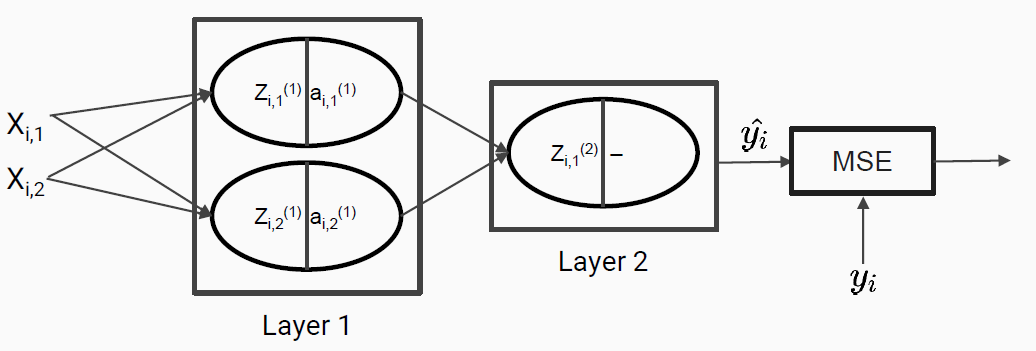

In [1]:
import os, random
import numpy as np
from matplotlib import pyplot as plt

# Set the project root directory as the current working directory
project_root = os.path.abspath(os.path.join('..', '..'))
os.chdir(project_root)

# Import my own modules
from src.nn import MLP

In [2]:
# Dataset - XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# Build the model
mlp = MLP(nin=2, nouts=[2,1], act=['sigmoid', 'linear'])
# Set parameters
loss = 'mseLoss'
epochs = 5000
lr = 0.1

##### Case A: GD
Hyperparameter (lr) learning rate

In [19]:
lr_list = np.logspace(-2, -1, 25)
loss_values = []
for lr in lr_list:
    mlp.reset()
    mlp.train_GD(X, y, loss=loss, epochs=epochs, lr=lr, out=False)
    loss_values.append(mlp._loss.value)
    y_pred = [round(yp.value, 4) for yp in mlp.forward(X)]
    print(f'lr={lr:.4f}\tloss={mlp._loss.value:.6f}\ty_pred={y_pred}')

lr=0.0100	loss=0.249855	y_pred=[0.5016, 0.4838, 0.5166, 0.4977]
lr=0.0110	loss=0.244317	y_pred=[0.445, 0.4839, 0.5348, 0.5445]
lr=0.0121	loss=0.245588	y_pred=[0.4457, 0.5247, 0.488, 0.5438]
lr=0.0133	loss=0.250021	y_pred=[0.4987, 0.5091, 0.4912, 0.5016]
lr=0.0147	loss=0.250196	y_pred=[0.4825, 0.5, 0.5009, 0.5185]
lr=0.0162	loss=0.234814	y_pred=[0.3804, 0.5368, 0.5135, 0.5859]
lr=0.0178	loss=0.250155	y_pred=[0.5129, 0.4996, 0.4998, 0.4868]
lr=0.0196	loss=0.250116	y_pred=[0.4856, 0.4912, 0.5086, 0.5141]
lr=0.0215	loss=0.010528	y_pred=[0.1192, 0.8828, 0.9079, 0.0746]
lr=0.0237	loss=0.214495	y_pred=[0.3519, 0.5476, 0.5519, 0.5733]
lr=0.0261	loss=0.131688	y_pred=[0.1508, 0.778, 0.5645, 0.5147]
lr=0.0287	loss=0.131009	y_pred=[0.4153, 0.5874, 0.7088, 0.3099]
lr=0.0316	loss=0.083371	y_pred=[0.3433, 0.6857, 0.7572, 0.2394]
lr=0.0348	loss=0.249773	y_pred=[0.5028, 0.4918, 0.5086, 0.4966]
lr=0.0383	loss=0.025915	y_pred=[0.185, 0.8226, 0.8492, 0.1218]
lr=0.0422	loss=0.013341	y_pred=[0.1358, 0.8895,

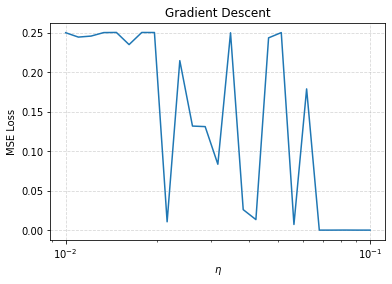

In [20]:
# Plot the loss curves for different learning rates
plt.figure()
plt.plot(lr_list, loss_values)
plt.xscale('log')
plt.xlabel('$\eta$')
plt.ylabel('MSE Loss')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.title('Gradient Descent')
plt.show()

In [21]:
lr_list = np.logspace(-3, -1, 5)
loss_values = []
for lr in lr_list:
    mlp.reset()
    history = mlp.train_GD(X, y, loss=loss, epochs=epochs, lr=lr)
    loss_values.append(history)

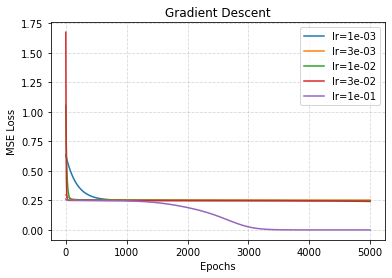

In [22]:
epoch_list = np.arange(epochs)
plt.figure()
for i, lr in enumerate(lr_list):
    plt.plot(epoch_list, loss_values[i], label=f'lr={lr:.0e}')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.title('Gradient Descent')
plt.show()

##### Case B: SGD
Hyperparameter (lr) learning rate

In [23]:
lr_list = np.logspace(-2, -1, 25)
loss_values = []
for lr in lr_list:
    mlp.reset()
    mlp.train_SGD(X, y, loss=loss, epochs=epochs, lr=lr, out=False)
    loss_values.append(mlp._loss.value)
    y_pred = [round(yp.value, 4) for yp in mlp.forward(X)]
    print(f'lr={lr:.4g}\tloss={mlp._loss.value:.4f}\ty_pred={y_pred}')

lr=0.01	loss=0.0007	y_pred=[0.0188, 0.975, 0.9748, 0.0359]
lr=0.01101	loss=0.2617	y_pred=[0.3429, 0.5772, 0.5012, 0.5837]
lr=0.01212	loss=0.0941	y_pred=[0.2944, 0.5741, 0.5818, 0.5574]
lr=0.01334	loss=0.0000	y_pred=[0.0001, 1.0, 1.0, 0.0]
lr=0.01468	loss=0.0027	y_pred=[0.0496, 0.9485, 0.4979, 0.5422]
lr=0.01616	loss=0.0043	y_pred=[0.0299, 0.9614, 0.9619, 0.0597]
lr=0.01778	loss=0.0000	y_pred=[0.0009, 0.9988, 0.9988, 0.0017]
lr=0.01957	loss=0.0000	y_pred=[0.0002, 0.9999, 0.9999, 0.0001]
lr=0.02154	loss=0.2801	y_pred=[0.5013, 0.54, 0.4742, 0.5019]
lr=0.02371	loss=0.0002	y_pred=[0.0209, 0.9867, 0.9873, 0.0094]
lr=0.0261	loss=0.0000	y_pred=[0.0, 1.0, 1.0, 0.0]
lr=0.02873	loss=0.0000	y_pred=[0.0012, 0.9986, 0.9994, 0.0005]
lr=0.03162	loss=0.3011	y_pred=[0.489, 0.4911, 0.4938, 0.4952]
lr=0.03481	loss=0.0000	y_pred=[0.0, 1.0, 1.0, 0.0]
lr=0.03831	loss=0.1772	y_pred=[0.4734, 0.6925, 0.3541, 0.3823]
lr=0.04217	loss=0.0000	y_pred=[0.0, 1.0, 1.0, 0.0]
lr=0.04642	loss=0.0000	y_pred=[0.0, 1.0, 1.0,

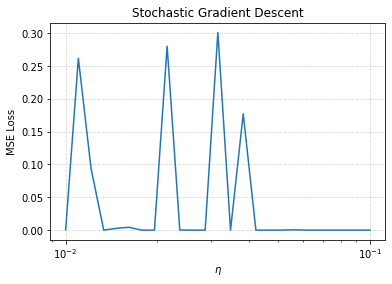

In [24]:
# Plot the loss curves for different learning rates
plt.figure()
plt.plot(lr_list, loss_values)
plt.xscale('log')
plt.xlabel('$\eta$')
plt.ylabel('MSE Loss')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.title('Stochastic Gradient Descent')
plt.show()

In [25]:
lr_list = np.logspace(-3, -1, 5)
loss_values = []
for lr in lr_list:
    mlp.reset()
    history = mlp.train_SGD(X, y, loss=loss, epochs=epochs, lr=lr)
    loss_values.append(history)

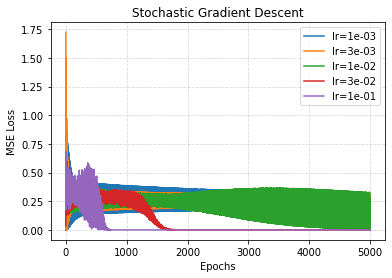

In [26]:
epoch_list = np.arange(epochs)
plt.figure()
for i, lr in enumerate(lr_list):
    plt.plot(epoch_list, loss_values[i], label=f'lr={lr:.0e}')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.title('Stochastic Gradient Descent')
plt.show()

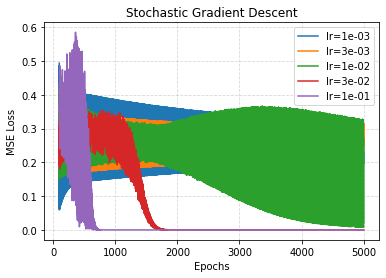

In [27]:
epoch_list = np.arange(epochs)
epoch_list = epoch_list[100:]
plt.figure()
for i, lr in enumerate(lr_list):
    plt.plot(epoch_list, loss_values[i][100:], label=f'lr={lr:.0e}')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.title('Stochastic Gradient Descent')
plt.show()

##### Case C: Mini Batch SGD
Hyperparameter:
- Learning rate (lr)
- Batch size

In [24]:
epochs = 5000
lr = 1e-1
batch_size_list = [1, 2, 4]
loss_values = []
for batch_size in batch_size_list:
    mlp.reset()
    history = mlp.train_miniBatch_SGD(X, y, loss=loss, epochs=epochs, lr=lr, batch_size=batch_size)
    loss_values.append(history)

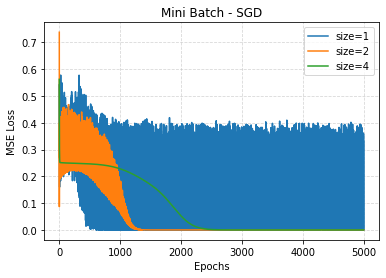

In [25]:
epoch_list = np.arange(epochs)
plt.figure()
for i, batch_size in enumerate(batch_size_list):
    plt.plot(epoch_list, loss_values[i], label=f'size={batch_size}')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.title('Mini Batch - SGD')
plt.show()

##### Case D: GD - 1st Momentum
Hyperparameter:
- Learning rate (lr)

In [15]:
epochs = 5000
mu = 0.99
lr_list = np.logspace(-3, -1, 3)
loss_values = []
for lr in lr_list:
    mlp.reset()
    history = mlp.train_GD_momentum(X, y, loss=loss, epochs=epochs, lr=lr, mu=mu)
    loss_values.append(history)

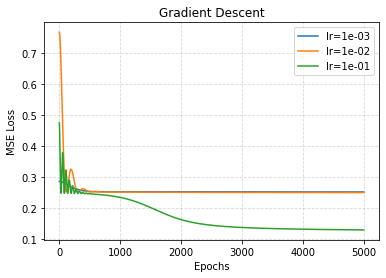

In [16]:
epoch_list = np.arange(epochs)
plt.figure()
for i, lr in enumerate(lr_list):
    plt.plot(epoch_list, loss_values[i], label=f'lr={lr:.0e}')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.title('Gradient Descent')
plt.show()